In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual
from putils import *

# Flujos2D, puntos fijos

Para el Flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

los puntos fijos seran aquellos que satisfacen simultaneamente

$f(x,y) = 0$

$g(x,y) = 0$

Cada una de estas ecuaciones se puede ver como la forma implicita de una curva en el plano $(x,y)$ y se conoce como *nulclina*. Podemos representar esas dos curvas en el plano (la nulclina de $\dot{x}=0$ y la nulclina de $\dot{y}=0$). Los puntos fijos estaran entonces en los puntos donde se corten estas dos curvas. Claramente para el caso lineal las nulclinas son dos rectas que de forma generica se cortan en solo un punto. 

Vamos a ver un sistema no lineal simple como ejemplo para un calculo simple de las nulclinas

$\dot{x} = a-y$

$\dot{y} = x^2-y$

En este caso la primera nulclina es una recta horizontal en $y=a$ y la segunda nulclina es una parabola en el origen $y=x^2$. Para $a>0$ tenemos dos puntos fijos en $(x_*=-\sqrt{a},y_*=a)$ y en $(x_*=\sqrt{a},y_*=a)$

In [2]:
def nodosilla2d(t, x, a):
    return[
        a-x[1],
        x[0]*x[0]-x[1]
    ]

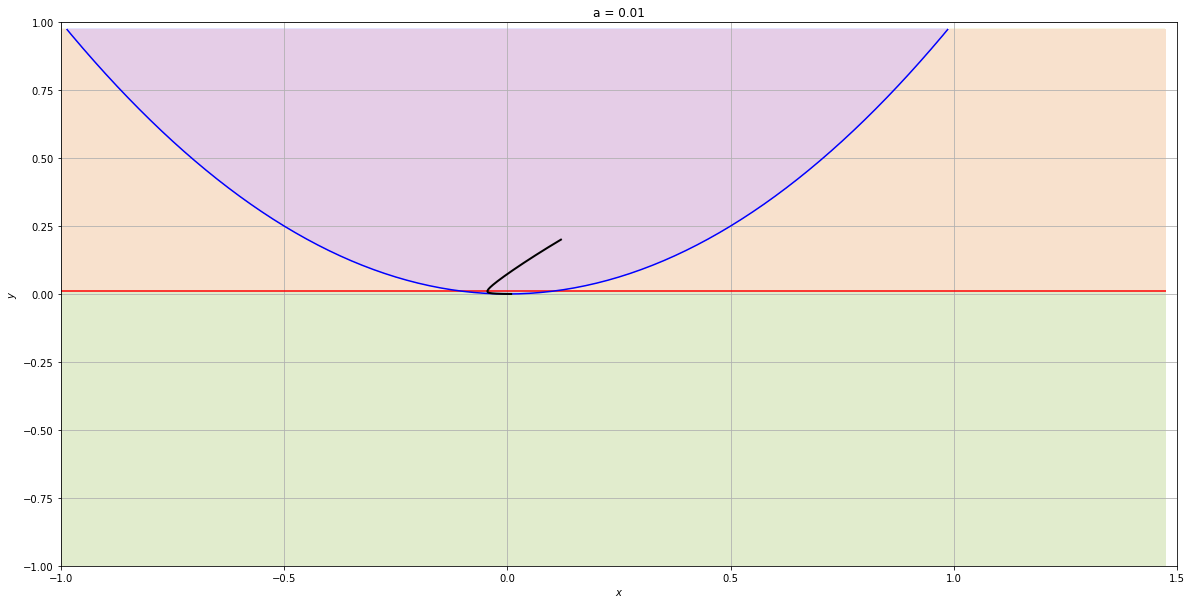

In [3]:
pars = {'a':0.01}
xini = [0.12,0.2]
tmax=10; dt = 0.001
solve_plot2D_nulclinas(nodosilla2d,pars,xini,tmax,dt,ranges=[[-1,1.5],[-1,1]])

In [4]:
def plot2D_nodosilla_interactive(a,x0,y0,tmax,xmax,ymax):
    pars = {'a':a}
    xini = [x0,y0]
    dt = tmax/100
    solve_plot2D_nulclinas(nodosilla2d,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot1 = interactive(plot2D_nodosilla_interactive,
                    a=(-0.5,0.5,0.01), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,30,0.01),
                    xmax=(0,2),
                    ymax=(0,2))

iplot1    

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5, step=0.01), FloatSlider(value…

## Oscilador de Duffing
 Asi como el Oscilador armónico (sistema lineal) se puede ver como el movimiento unidimensional de una particula en un pozo. El oscilador de Duffing corresponde al movimiento en un doble pozo (que de todas formas mediante un cambio de parametro se puede volver de pozo simple pero sin dejar de ser no lineal). 

<div>
<img src="files/single_double_well.png" width="500px">
</div>
 
Un sistema fisico (si bien algo artificial) que tiene este comportamiento se puede armar con una lengueta metalica flexible puesta entre dos imanes:
<div>
<img src="files/duffing.png" width="300px">
</div>

Si la potencia de los imanes no supera la rigidez de la lengueta tenemos la situacion de un unico pozo (si bien no es una oscilacion libre por la presencia de los imanes) y hay un solo atractor (el centro). Si la rigidez baja (o los imanes se acercan, o se ponen imanes mas potentes) hay dos situaciones de equilibrio estable (apuntando a uno u otro iman) separados por un punto inestable (que como vamos a ver mas adelante es un punto silla).

Las ecuaciones del oscilador de Duffing son las siguientes:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

En el caso de la lengueta con los imanes $x$ es la posicion horizontal de la punta, $y$ la velocidad (de ahi la primera ecuacion diferencial), $\gamma$ es la disipacion del aire y la friccion (igual que en el caso del resorte es una fuerza que se opone a la velocidad) y en $\beta$ esta resumida la relacion entre la fuerza de los imanes y la rigidez de la lengueta. Si $\beta$ es positivo ganan los imanes y si es negativo gana la rigidez. Notar que el termino cubico es el que termina ganando siempre, muy lejos del equilibro la fuerza es siempre atractiva, por lo tanto el sistema no va a explotar.

Este sistemita simple al ser forzado periodicamente presenta CAOS!

# Puntos fijos 
Vamos a calcular los puntos fijos primero por el metodo de las nulclinas.

La primera nuclina es trivial, me da una recta horizontal $y=0$ con lo cual todos los puntos fijos van a estar sobre el eje $x$

La segunda nulclina se resuelve en una ecuacion cubica para $y$ en funcion de $x$:

$y = (\beta x - x^3)/ \gamma $

y recordemos que una cubica podia tener forma de "N" si el termino lineal y cubico tenian signo diferente ($\beta > 0$) o una doble curva suave si tenian el mismo signo ($\beta < 0$). $\gamma$ actua solo como factor de escala haciendo mas alta o mas baja la "N". 

<div>
<img src="files/cubic.png" width="500px">
</div>

En este caso si bien usamos el metodo de las nulclinas como de la primera ecuacion sabemos que $y=0$ los puntos fijos van a ser las raices de esta cubica, es decir donde corte el eje horizontal. Por lo tanto basta con resolver 

$\beta x = x^3$

que tiene una solucion trivial $x^*_1=0$ y despues, solo para el caso de $\beta>0$ dos soluciones simetricas (que se obtienen dividiendo ambos miembros de la ecuacion anterior por $x$ ya que es diferente de 0) en 

$x^*_{2,3} = \pm \sqrt{\beta}$

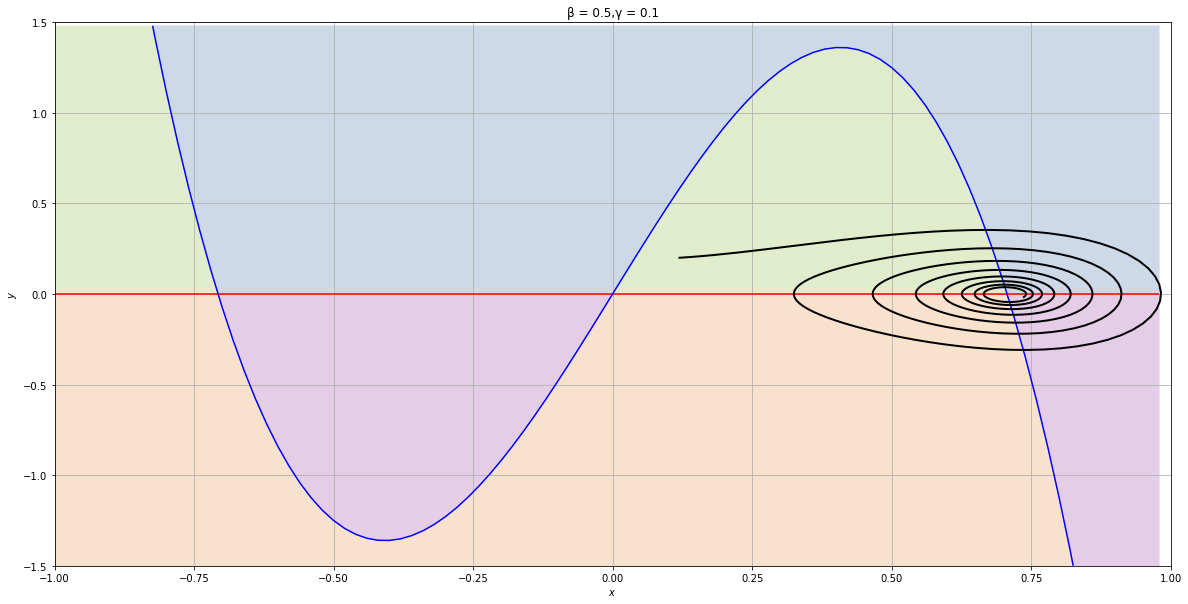

In [5]:
#definimos la Ed para el oscilador de Duffing
def duffing(t, x, β, γ):
    return[
        x[1],
        -γ*x[1]+x[0]*(β-x[0]**2),
    ]

dt = 0.1; tmax = 50; pars={'β':0.5,'γ':0.1}
xini = [0.12,0.2]
solve_plot2D_nulclinas(duffing,pars,xini,tmax,dt,ranges=[[-1,1],[-1.5,1.5]])

In [6]:
def plot2D_duffing_interactive(β,γ,x0,y0,tmax,xmax,ymax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'β':β,'γ':γ}
    solve_plot2D_nulclinas(duffing,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot2 = interactive(plot2D_duffing_interactive,
                    β = (-1.0,1.0,0.001),
                    γ = (0, 1.0, 0.001),
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01),
                    xmax=(0,2,0.1),
                    ymax=(0,2,0.1))

iplot2    

interactive(children=(FloatSlider(value=0.0, description='β', max=1.0, min=-1.0, step=0.001), FloatSlider(valu…

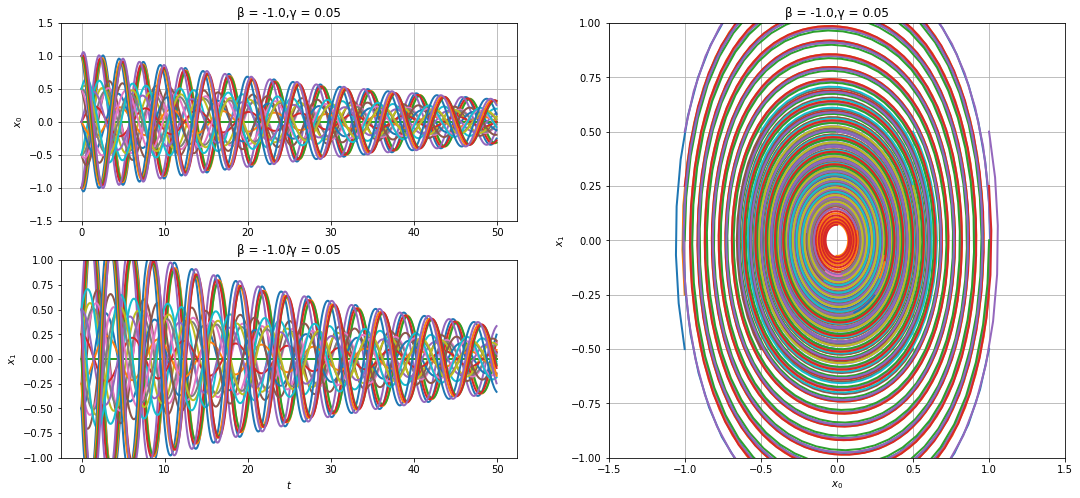

In [7]:
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,5) for y0 in np.linspace(-0.5,0.5,5)]
dt = 0.1; tmax = 50; pars={'β':-1.0,'γ':0.05}
solve_plot2D_multiple(duffing,pars,xini_array,tmax,dt,ranges=[[-1.5,1.5],[-1,1]],method='RK45')

# Flujos 2D, Linealizacion, Estabilidad

Los puntos fijos pueden ser de forma general de tipo silla, nodo/foco atractor/repulsor o centros. Esto es porque MUY cerca (arbitrariamente cerca para ser mas precisos) del punto fijo el campo vector se puede aproximar como un sistema lineal, donde los coeficientes de la matriz $A$ son las derivadas (parciales) de las funciones $f$ y $g$ con respecto a las dos variables. Esto es:

${\bf A} =
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$

tambien conocida como el *Jacobiano* del campo vector $[f,g]$

Por ejemplo para el primer caso que vimos con dos puntos fijos y nulclinas en forma de recta horizontal y parabola:

$f(x,y) = a-y$

$g(x,y) = x^2-y$

Calculamos cada una de las derivadas

$\frac{\partial f}{\partial x}=0 \quad$  ya que $f$ no depende de x

$\frac{\partial f}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

$\frac{\partial g}{\partial x}=2x \quad$  la derivada de la funcion cuadratica $x^2$ es $2x$

$\frac{\partial g}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

La matriz Jacobiana es entonces.

$
\begin{pmatrix}
0 & -1\\
2x & -1
\end{pmatrix}
$

esa matriz evaluada en los puntos fijos me dice como se comporta el flujo en un entorno local de los mismos. Por ejemplo en este caso para los puntos fijos la matriz va a ser

$
\begin{pmatrix}
0 & -1\\
-2\sqrt{a} & -1
\end{pmatrix}
$

para el punto fijo de la izquierda (x<0) y tiene determinante negativo asi que es un punto silla para todos los valores de $a>0$.

Y para el punto fijo de la derecha la matriz sera:

$
\begin{pmatrix}
0 & -1\\
2\sqrt{a} & -1
\end{pmatrix}
$

que tiene determinante positivo y traza negativa asi que es un atractor (dependiendo del valor de $a$ puede ser un foco o un nodo. 

Se puede verificar esto en el grafico interactivo para ver que cuanjdo se crean los puntos fijos el atractor esta siempre a la derecha. OJO no confundir aca la pendiente de la parabola cuando corta la linea horizontal - nulclinas - con los graficos que haciamos de $f(x)$ para los Flujos 1D. Para calcular la estabilidad ahora hay que evaluar la matriz jacobiana y en el caso del punto de la derecha tiene determinante positivo y traza negativa por lo tanto es atractor, y eso no puede verse del grafico de las nulclinas.

## Estabilidad: Oscilador de Duffing

Vamos a estudiar ahora la estabilidad del Oscilador de Duffing:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

Que, como vimos, tiene un punto fijo siempre en $x^*_1=0$ y luego para $\beta>0$ un par de puntos fijos en $x^*_{2,3} = \pm \sqrt{\beta}$

El primer paso es calcular la matriz Jacobiana, lo hacemos paso por paso:

${\bf A} =
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$

Calculamos cada una de las derivadas

$\frac{\partial f}{\partial x}=0 \quad$  ya que $f$ no depende de x

$\frac{\partial f}{\partial y}=1 \quad$  ya que la derivada de una funcion lineal es la pendiente

$\frac{\partial g}{\partial x}=\beta-3x^2 \quad$  la derivada de la funcion cubica es $\beta-3x^2$, lo podemos verificar usando la funcion diff del modulo sympy

$\frac{\partial g}{\partial y}=-\gamma \quad$  ya que la derivada de una funcion lineal es la pendiente

La matriz Jacobiana es entonces.

$
\begin{pmatrix}
0 & 1\\
\beta-3x^2 & -\gamma
\end{pmatrix}
$

$\gamma$ es siempre positivo (dispacion), por lo tanto la traza es siempre negativa (sera atractor o punto silla dependiendo del determinante). 

Ahora hay que evaluarla en los puntos fijos.
La evaluamos primero en el punto fijo 

$x=0$.

$
\begin{pmatrix}
0 & 1\\
\beta & -\gamma
\end{pmatrix}
$

el determinante es $-\beta$. Es simple, cuando tenemos un punto fijo $\beta<0$, el determinante es positivo el punto fijo es atractor (la traza es siempre negativa). Es tiene sentido porque es la situacion en la que la lengueta no llega a ser atraida por los imanes y se queda piola en el centro.
En cambio cuando tenemos tres puntos fijos ($\beta>0$) este pasa a ser el del medio y el determinante es negativo por lo tanto es un punto silla. 

Veamos ahora el caso de los otros dos puntos fijos, notando que como en el Jacobiano aparece solo $x^2$, los dos puntos fijos tienen el mismo Jacobiano:

$x=\pm \sqrt{\beta}$.

$
\begin{pmatrix}
0 & 1\\
-2\beta & -\gamma
\end{pmatrix}
$

el determinante es $2\beta$, o sea tiene el signo inverso que el del determinate del Jacobiano del punto fijo del medio, lo cual una vez mas tiene sentido porque cuando hay tres puntos fijos vimos que ese punto se transforma en un punto silla y los puntos en $x=\pm \sqrt{\beta}$ solo existen para $\beta>0$, o sea tienen siempre determinate positivo (y traza negativa siempre) por lo tanto son atractores. Es decir que para el caso de tres puntos fijos tenemos un punto silla en el medio separando dos atractores.

El punto silla es en cierta forma un punto fijo inestable, en la direccion del movimiento, porque si trato de poner la lengueta en el medio cuando los imanes atraen mucho no se queda en ese sitio y se va para uno de los dos atractores (que obviamente son los imanes). Pero no es un repulsor, ya que todo el sistema es atractor globalmente, si una trayectoria pasa por el centro inestable va a perder velocidad por la friccion y el sistema va a ir decayendo. En el caso de mucho friccion ($\gamma$ muy alto) el sistema va pareciendose cada vez mas a un sistema 1D (verlo en el grafico interactivo)

# Bifurcacion Saddle-Node en el plano

Volviendo al sistema:

$\dot{x} = a-y$

$\dot{y} = x^2-y$

Donde se puede ver que lo que sucede a medida que $a$ se aproxima a cero por los positivos es que los dos puntos fijos (un punto silla y un atractor) se van acercando y para $a=0$ colapsan y se produce una bifurcacion de nodo-silla en el plano. 

El cambio del flujo debido a la bifurcacion es analogo a lo que observabamos en 1D, ya que la bifurcacion se produce a lo largo de una curva (llamada variedad central), y en la direccion perpendicular a la curva el flujo es atractor. Esto se ve mas claro si le agregamos un parametro que permita amplificar la disipacion b

$\dot{x} = a-y$

$\dot{y} = x^2-by$

Cuando b es muy grande como se puede probar en las celdas que siguen el flujo converge muy rapidamente a la nulclina de $\dot{y}=0$ y una vez sobre esa curva se mueve mas lentamente hacia el nodo atractor. Es decir que en este caso la dimension adicional entra como una variable rapida (un transitorio), pero la dinamica interesante sucede a lo largo de la curva (parabola) y sobre esa curva se produce la bufurcacion.


In [8]:
def nodosilla2d(t, x, a, b):
    return[
        a-x[1],
        x[0]*x[0]-b*x[1]
    ]

In [9]:
def plot2D_nodosilla_interactive(a,b,x0,y0,tmax,xmax,ymax):
    pars = {'a':a,'b':b}
    xini = [x0,y0]
    dt = tmax/100
    solve_plot2D_nulclinas(nodosilla2d,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot1 = interactive(plot2D_nodosilla_interactive,
                    a=(-0.5,0.5,0.01), 
                    b=(0.0,10.0,0.01),  
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,30,0.01),
                    xmax=(0,2,0.1),
                    ymax=(0,2,0.1))

iplot1    

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5, step=0.01), FloatSlider(value…

# Bifurcacion Pitchfork en el plano

Volviendo al oscilador de Duffing:

$\dot{x} = y$

$\dot{y} = -\gamma y + \beta x -  x^3 $

Con puntos fijos en:

Para $\beta<0$:
    
$x^*_1=0$ atractor

Para $\beta>0$:

$x^*_1=0$ punto silla

$x^*_{2,3} = \pm \sqrt{\beta}$ atractores

El punto fijo en cero cambia de estabilidad y al mismo tiempo aparecen otros dos puntos fijos, eso es una bifurcacion de Pitchork. Pero notar que el cambio de estabilidad es de un nodo atractor a un punto silla (no un repulsor). Eso es porque hay una direccion (transverrsal a la parabola) que es siempre atractora, y ese punto fijo luego de la bifurcacion pasa a tener una direccion inestable (punto silla) y esa direccion inestable es en la direccion tangente a la parabola. Verificar eso en el grafico interactivo.

-0.2
-0.17894736842105263
-0.15789473684210528
-0.1368421052631579
-0.11578947368421054
-0.09473684210526317
-0.0736842105263158
-0.052631578947368446
-0.03157894736842107
-0.01052631578947369
0.010526315789473661
0.03157894736842104
0.05263157894736842
0.0736842105263158
0.09473684210526312
0.1157894736842105
0.13684210526315788
0.15789473684210525
0.17894736842105263
0.2


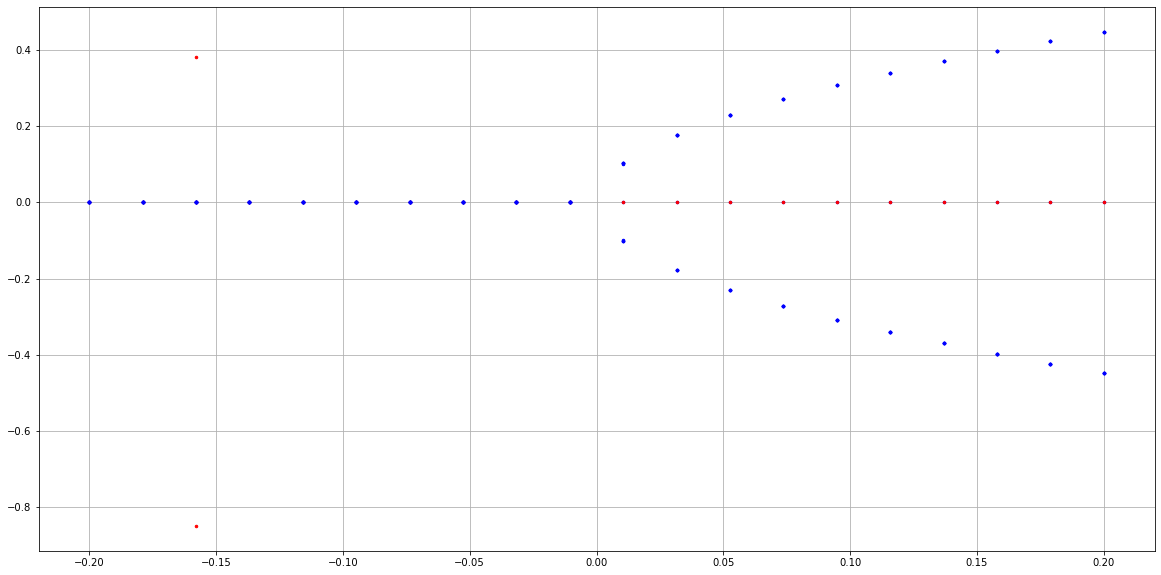

In [10]:
dt = 0.5; tmax = 100; pars={'β':0.0,'γ':0.2}
hvals = np.linspace(-0.2,0.2,20)
xini = [[-0.5+0.1*n, 0] for n in range(10)]
bifurcation_diag(duffing, pars, xini, tmax, dt, 'β', hvals, xrange=[-1,1]);

# Bifurcacion de Hopf

En Flujos 2D existe otra bifurcacion que no existe en 1D. Cuando un punto fijo pierde estabilidad, pasa de ser atractor a repulsor lo hace a traves de un centro (foco atractor que se transforma en repulsor). Esto sucede cuando el Determinante del Jacobiano es positivo y la Traza cambia de signo pasando por cero. 

En un sistema lineal eso significa unicamente un cambio de direccion en el flujo del foco (espiral atractor a repulsor). Pero en los sistemas no lineales los terminos de orden mas alto dan de forma generica origen a un ciclo limite que es expelido del foco y se produce una Bifurcacion de Hopf con el cambio de estabilidad. Hay dos tipos de B de Hopf, supercritica y subcritica. Por ahora nos va a interesar mas la supercritica y para este tipo la historia es asi: de un lado de la bifurcacion (en la figura para $\beta<0$) tengo un foco atractor, el Jacobiano tiene traza negativa. En la bifurcacion el foco se transforma en un centro ($\beta=0$) y las trayectorias se siguen aproximando (por los terminos no lineales) pero no convergen nunca al centro. Y luego de la bifurcacion el punto fijo pierde estabilidad y se transforma en repulsor. Pero ahora bien como es una bifurcacion LOCAL, el flujo lejos "no se entero" del cambio de estabilidad y sigue siendo atractor (dominan) los terminos no lineales. Por lo tanto el flujo sigue siendo globalmente atractor y se acerca a al regio del centro, pero como al mismo tiempo es expelido de el, en alguna parte se tiene que acumular y se forma un ciclo limite estable. O sea, del otro lado de la bifurcacion (para $\beta>0$) tengo un foco repulsor que alimenta a un ciclo limite atractor.

<div>
<img src="files/hopf.png" width="500px">
</div>

La forma normal de la bifurcacion de Hopf (supercritica) es la siguiente


$\dot{x} = \beta x - y - x(x^2+y^2) $

$\dot{y} = x + \beta y - y(x^2+y^2) $

Parece complicado pero veamos primero que el punto fijo esta en $(0,0)$ y si queremos calcular el Jacobiano va a tener un monton de terminos pero solo van a sobrevivir los que no tengan ni $x$ ni $y$ porque esos van a ser cero. Asi que el Jacobiano evaluado en el punto fijo $(0,0)$ es solo el de la parte lineal y es:

$
\begin{pmatrix}
\beta & -1\\
1 & \beta 
\end{pmatrix}
$

La traza es $2\beta$ y el determinante siempre positivo $\beta^2+1$. Por lo tanto cuando $\beta$ cruza el cero cambia el signo de la Traza y el foco pasa de ser atractor a repulsor como muestra la figura.

Por otro lado los terminos no lineales tienen una expersion que equivale al radio al cuadrado $(x^2+y^2)$ con la variable cambiada de signo por lo tanto siempre van a ser atractores lejos. 

In [10]:
def hopf(t, x, β):
    R2 = x[0]**2+x[1]**2
    return[
        β*x[0] - x[1] - x[0]*R2,
        x[0] + β*x[1] - x[1]*R2
    ]

In [11]:
def plot2D_hopf_interactive(β,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/200
    pars={'β':β}
    solve_plot(hopf,pars,xini,tmax,dt)

iplot2 = interactive(plot2D_hopf_interactive,
                    β = (-1.0,1.0,0.001),
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,100,0.01))

iplot2    

interactive(children=(FloatSlider(value=0.0, description='β', max=1.0, min=-1.0, step=0.001), FloatSlider(valu…

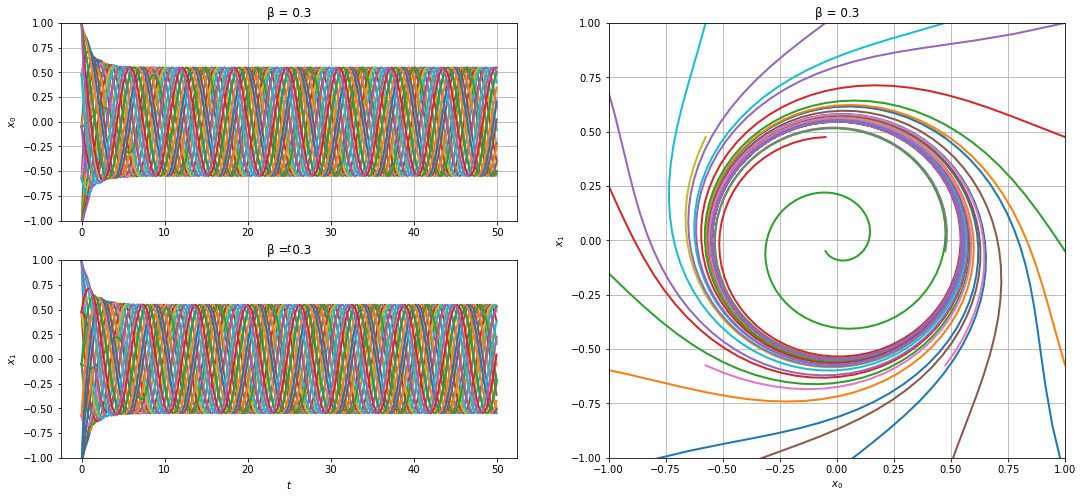

In [12]:
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1.1,1,5) for y0 in np.linspace(-1.1,1,5)]
dt = 0.1; tmax = 50; pars={'β':0.3}
solve_plot2D_multiple(hopf,pars,xini_array,tmax,dt,ranges=[[-1,1],[-1,1]],method='RK45')